1. Importing the modules
2. Adding the parameters (as constants?)
3. Adding the time data
4. Creating zero arrays of values we will calculate (B, dB etc)
5.These are zero arrays whose elements can be replaced one by one. If not creating empty lists is also an option and in that case the values caluclated can be appended to the list.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

radiation = 5
K = 0.7
RUE = 1.85
alpha = 0.00243
LAI_max = 7
T_Base = 7
TTM = 1200
TTL = 700

# Example weather data for 10 days
Tmax_data = [30, 31, 29, 28, 32, 33, 34, 31, 30, 29]  # Max temperatures (°C)
Tmin_data = [20, 19, 21, 18, 22, 21, 20, 19, 18, 21]  # Min temperatures (°C)


B = np.zeros(11) 
LAI = np.zeros(11)  
TT = np.zeros(11)  
dTT = np.zeros(11)  
dB = np.zeros(11) 
dLAI = np.zeros(11)  

Initial conditions are defined. Here they are added as the first element of the list created before.

In [2]:

# Initial conditions
B[0] = 0.0    # Initial biomass
LAI[0] = 0.01  # Initial Leaf Area Index
TT[0] = 0.0   # Initial thermal time

The functions to calculate the dB, dTT, dLAI are defined. These functions will be called later to calculate dB at time t or day for example.


In [3]:
# Thermal time accumulation
def thermal_time(Tmax, Tmin, T_base):
    return max((Tmax + Tmin) / 2 - T_base, 0)

# Biomass growth 
def biomass_growth(RUE, K, LAI, radiation, TT, TTM):
    if TT <= TTM:
        return RUE * (1 - np.exp(-K * LAI)) * radiation
    else:
        return 0

# LAI growth 
def lai_growth(LAI, TT, TTL, alpha, LAI_max):
    if TT <= TTL:
        return alpha * LAI * (LAI_max - LAI)
    else:
        return 0

The loop begins with
1. For day in range of 0 to 10 for every value
it will take Tmax and here the value of tmax for day 1 is tmax at day-1 because the element which corresponds to day 1 in the list tmax is the zeroth element.

lets look at the first iteration of the loop

At day 0 it will calculate dTT at day 0
Then calculate TT at day 1 (because at zero we have already initiated) using TT(0)(initial value as given) and dTT(0), from what it just calculated.
It does the same for dB, dLAI,B(day+1) and LAI(day+1) and son on and so forth.


In [4]:
for day in range(10):
    Tmax = Tmax_data[day-1]
    Tmin = Tmin_data[day-1]

    dTT[day] = thermal_time(Tmax, Tmin, T_Base)
    TT[day+1] = TT[day] + dTT[day]
    dB[day] = biomass_growth(RUE, K, LAI[day], radiation, TT[day], TTM)
    dLAI[day] = lai_growth(LAI[day], TT[day], TTL, alpha, LAI_max)
    B[day+1] = B[day] + dB[day]
    LAI[day+1] = LAI[day] + dLAI[day]

In [5]:
TT

array([  0.,  18.,  36.,  54.,  72.,  88., 108., 128., 148., 166., 183.])

In [6]:
B

array([0.        , 0.0645239 , 0.13013989, 0.19686636, 0.264722  ,
       0.33372582, 0.40389715, 0.47525562, 0.54782122, 0.62161425,
       0.69665535])

In [7]:
LAI

array([0.01      , 0.01016986, 0.01034259, 0.01051826, 0.01069691,
       0.01087859, 0.01106334, 0.01125123, 0.01144231, 0.01163662,
       0.01183423])

In [8]:
len(B)

11

So now we can see that TT, B , LAI values have been calculated for 11 days from day 0 which is initial to 10 days.

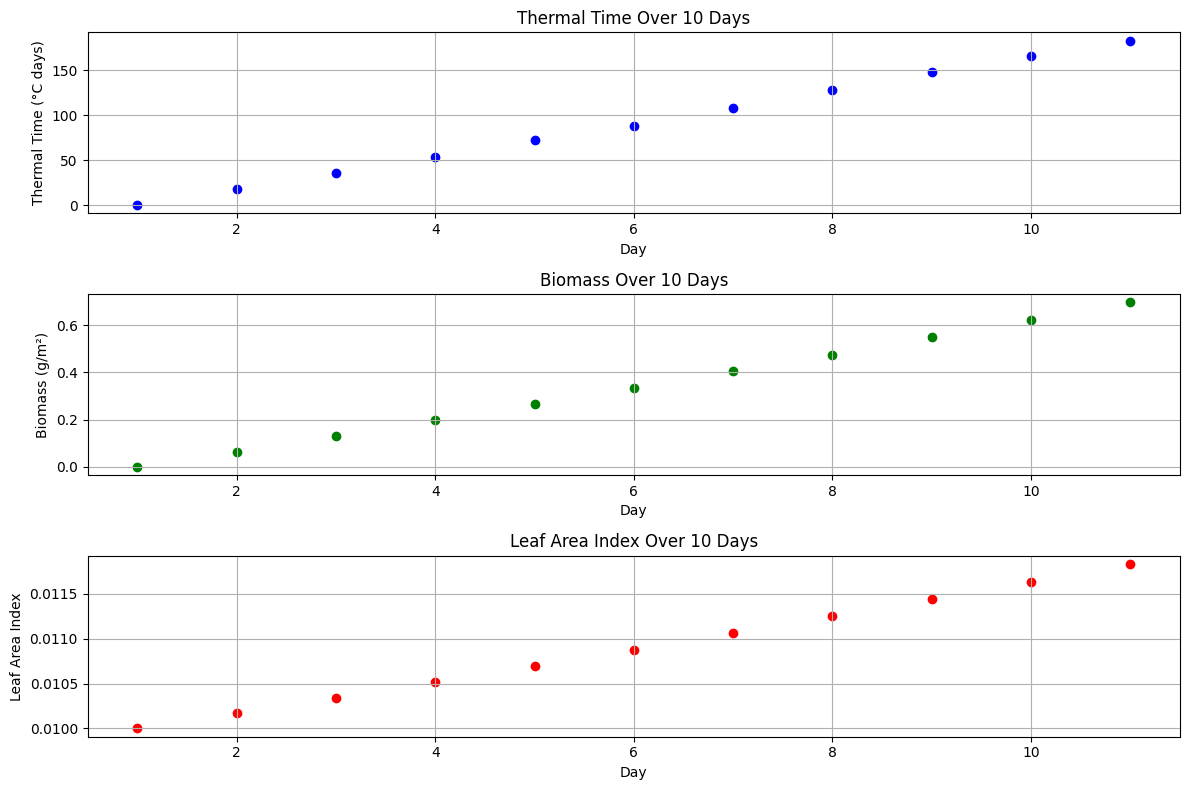

In [9]:
# Plot the results
plt.figure(figsize=(12, 8))

# Plot TT
plt.subplot(3, 1, 1)
plt.scatter(range(1, 12), TT, color='b', label='TT (°C days)', marker='o')
plt.title('Thermal Time Over 10 Days')
plt.xlabel('Day')
plt.ylabel('Thermal Time (°C days)')
plt.grid()

# Plot Biomass
plt.subplot(3, 1, 2)
plt.scatter(range(1, 12), B, color='g', label='Biomass (g/m²)', marker='o')
plt.title('Biomass Over 10 Days')
plt.xlabel('Day')
plt.ylabel('Biomass (g/m²)')
plt.grid()

# Plot LAI
plt.subplot(3, 1, 3)
plt.scatter(range(1, 12), LAI, color='r', label='LAI', marker='o')
plt.title('Leaf Area Index Over 10 Days')
plt.xlabel('Day')
plt.ylabel('Leaf Area Index')
plt.grid()

plt.tight_layout()
plt.show()

This explanation for the plotting code has been generated the courtesy of ChatGPT

# Explanation of the Plotting Code

## 1. Getting Ready to Draw
- We start by preparing a big canvas (the plot) where we can create three separate pictures.
- We set the size of the canvas to be wide enough (12 units wide and 8 units tall) so everything fits nicely.

## 2. Creating the First Picture: Thermal Time (TT)
- We want to show how Thermal Time changes over 10 days, so we start our first picture.
- We tell our program to draw the first picture in a row of three, meaning "make a canvas with 3 rows and 1 column, and I want to draw in the first row."

## 3. Adding Dots for TT
- We take our blue color and start putting dots on our first picture.
- Each dot represents the amount of Thermal Time (TT) for each day.

## 4. Adding Labels and Title
- We give our first picture a title so everyone knows what it is about.
- The title says "Thermal Time Over 10 Days."
- The x-axis (horizontal line) is labeled "Day," and the y-axis (vertical line) is labeled "Thermal Time (°C days)."

## 5. Adding Grid Lines
- We add some grid lines to our picture to help us see the dots better, like a checkerboard behind our dots.

## 6. Creating the Second Picture: Biomass (B)
- Now we move to the second picture to show how Biomass changes over the same 10 days.
- We say, "Let’s draw in the second row."

## 7. Adding Dots for Biomass
- We take our green color and add dots for Biomass.
- The label says "Biomass in g/m²" so we remember what these dots mean.

## 8. Adding Labels and Title for Biomass
- We give this second picture its own title and labels.
- The title is "Biomass Over 10 Days."

## 9. Creating the Third Picture: Leaf Area Index (LAI)
- Finally, we move to the third picture, where we will show how the Leaf Area Index (LAI) changes.
- We say, "Now let’s draw in the third row."

## 10. Adding Dots for LAI
- We take our red color and start adding dots for LAI.
- The label says "LAI" to help us remember what these dots mean.

## 11. Adding Labels and Title for LAI
- We give this picture a title and labels, just like the others.
- The title is "Leaf Area Index Over 10 Days."

## 12. Making Everything Fit
- Before we show our beautiful pictures, we make sure they all fit nicely together and look good.
- This helps avoid overlap and keeps everything organized.

## 13. Showing the Pictures
- Finally, we say, "Okay, let’s show everyone our three pictures!"


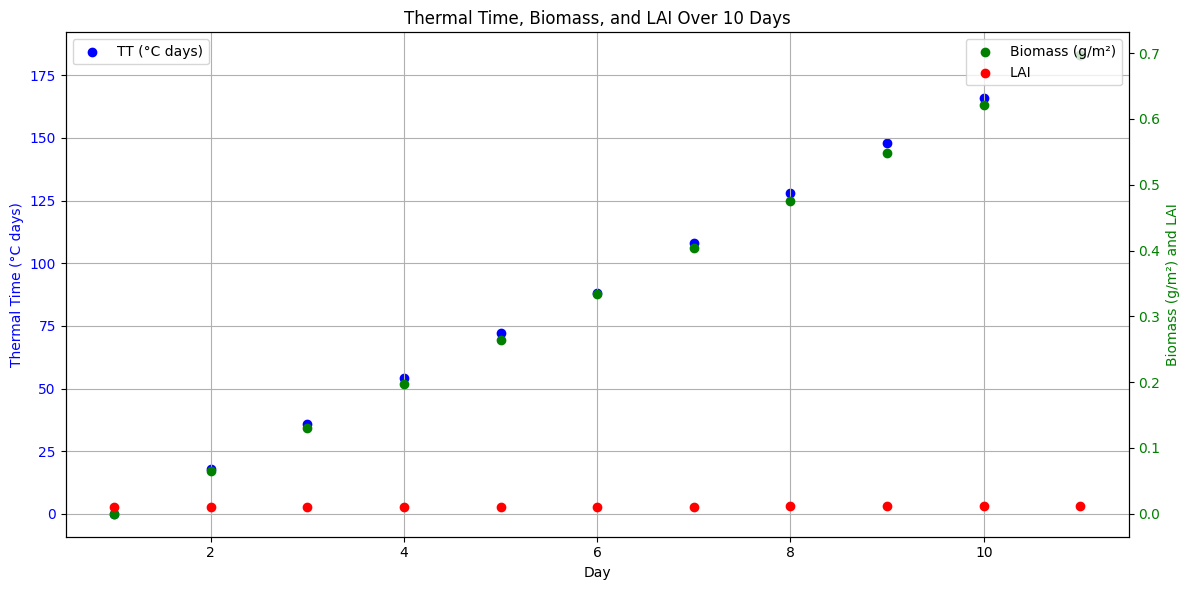

In [10]:
# Create a dual-axis plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot TT on the first y-axis
ax1.scatter(range(1, 12), TT, color='b', label='TT (°C days)', marker='o')
ax1.set_title('Thermal Time, Biomass, and LAI Over 10 Days')
ax1.set_xlabel('Day')
ax1.set_ylabel('Thermal Time (°C days)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.grid()

# Create a second y-axis for biomass and LAI
ax2 = ax1.twinx()
ax2.scatter(range(1, 12), B, color='g', label='Biomass (g/m²)', marker='o')
ax2.scatter(range(1, 12), LAI, color='r', label='LAI', marker='o')

# Set labels and ticks for the second y-axis
ax2.set_ylabel('Biomass (g/m²) and LAI', color='g')
ax2.tick_params(axis='y', labelcolor='g')

# Adding legends
ax1.legend(loc='upper left')
ax2.legend(['Biomass (g/m²)', 'LAI'], loc='upper right')

plt.tight_layout()
plt.show()

This is the code if i want to only dispaly the first 5 values of the simulation.

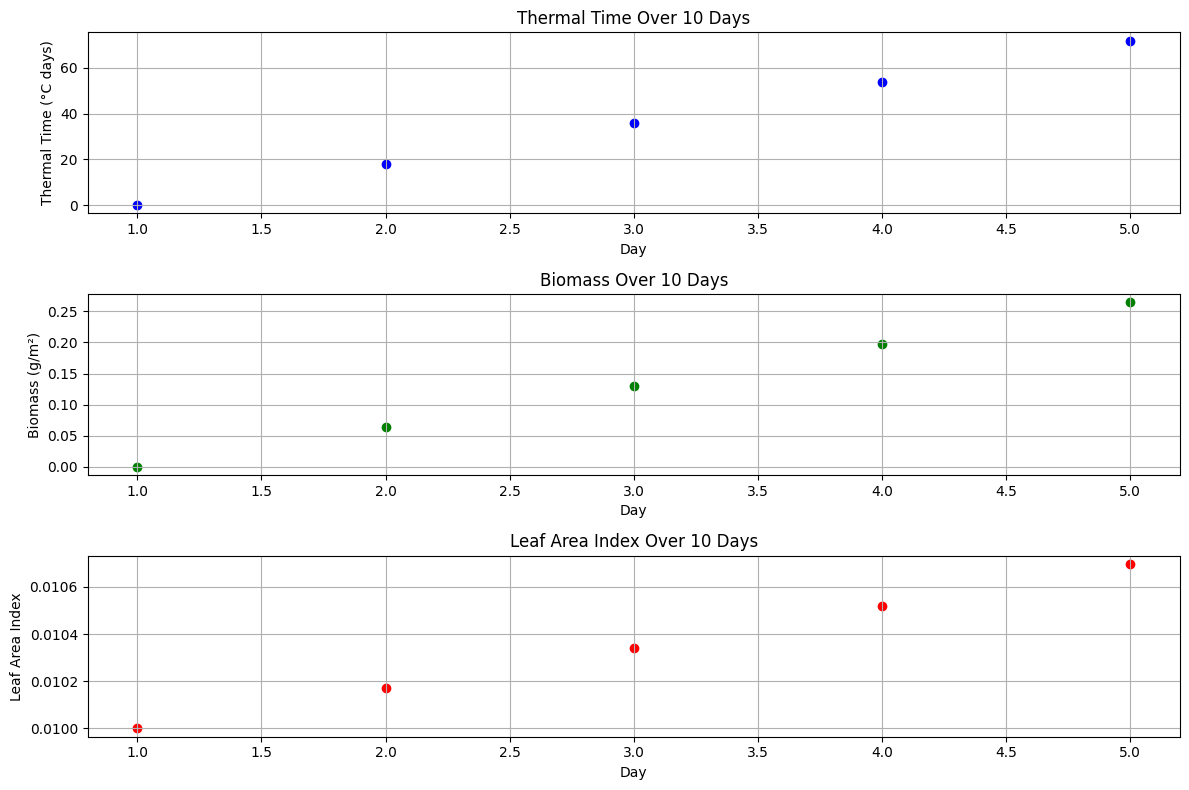

In [11]:
# Plot the results
plt.figure(figsize=(12, 8))

# Plot TT
plt.subplot(3, 1, 1)
plt.scatter(range(1, 6), TT[:5], color='b', label='TT (°C days)', marker='o')
plt.title('Thermal Time Over 10 Days')
plt.xlabel('Day')
plt.ylabel('Thermal Time (°C days)')
plt.grid()

# Plot Biomass
plt.subplot(3, 1, 2)
plt.scatter(range(1, 6), B[:5], color='g', label='Biomass (g/m²)', marker='o')
plt.title('Biomass Over 10 Days')
plt.xlabel('Day')
plt.ylabel('Biomass (g/m²)')
plt.grid()

# Plot LAI
plt.subplot(3, 1, 3)
plt.scatter(range(1, 6), LAI[:5], color='r', label='LAI', marker='o')
plt.title('Leaf Area Index Over 10 Days')
plt.xlabel('Day')
plt.ylabel('Leaf Area Index')
plt.grid()

plt.tight_layout()
plt.show()